# Exploratory Data Analysis

### Hello, dear reader! This is a notebook for EDA, just to let you know what kind of data our training dataset contains. feel free to adjust it locally if you need.

In this section, we load the dataset into a DataFrame using pandas. We set the `CLIENT_ID` as the index of the DataFrame for easier data manipulation. We also explore the data types of each feature to understand the structure of our dataset.

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv(r'data/loan_lead_scoring_train.csv', sep=';', encoding = 'windows-1251')

df = df.set_index(['CLIENT_ID'])

df.dtypes

Target                      int64
AGE                       float64
CHILDREN_CNT              float64
EDUCATION                  object
CLIENT_INCOME_AMT         float64
IS_CAR_FLG                 object
ADD_INCOME_AMT            float64
CARD_CUR_CNT                int64
REMN_PAYMENT_CNT          float64
LOAN_DAY_CNT              float64
LAST_CRD_OPEN_MNTH_CNT    float64
TR_MBANLOG_CNT_Q2           int64
MAX_CREDIT_REST_HY2       float64
CUR_DEP_AMT               float64
CUR_CREDIT_AMT            float64
dtype: object

Let's start our exploratory data analysis by looking at the first few rows of our dataset. This gives us a glimpse of the data we are working with, including the various features and their corresponding values.

In [11]:
df.head()

,Target,AGE,CHILDREN_CNT,EDUCATION,CLIENT_INCOME_AMT,IS_CAR_FLG,ADD_INCOME_AMT,CARD_CUR_CNT,REMN_PAYMENT_CNT,LOAN_DAY_CNT,LAST_CRD_OPEN_MNTH_CNT,TR_MBANLOG_CNT_Q2,MAX_CREDIT_REST_HY2,CUR_DEP_AMT,CUR_CREDIT_AMT
CLIENT_ID,,,,,,,,,,,,,,,
9529273,1,63.0,0.0,Высшее,786780.0,N,155000.0,0,0.0,3481.0,NaN,0,0.0,0.0,0.00
9529343,1,47.0,0.0,Высшее,650000.0,N,400000.0,0,0.0,1278.0,42.0,0,0.0,0.0,0.00
9529374,1,34.0,0.0,Высшее,8714983.0,Y,7864983.0,0,0.0,2168.0,119.0,8,0.0,NaN,0.00
9529498,1,48.0,0.0,Высшее,784686.0,Y,264686.0,2,64.0,177.0,6.0,0,0.0,NaN,4298330.22
9529576,1,62.0,0.0,Высшее,150000.0,Y,0.0,2,11.0,47.0,0.0,0,314900.0,NaN,54032.69


To better understand the numerical features, we'll look at their summary statistics. This includes measures like mean, standard deviation, and quantile ranges, which help us grasp the scale and distribution of each numerical feature.

In [12]:
df.describe()

,Target,AGE,CHILDREN_CNT,CLIENT_INCOME_AMT,ADD_INCOME_AMT,CARD_CUR_CNT,REMN_PAYMENT_CNT,LOAN_DAY_CNT,LAST_CRD_OPEN_MNTH_CNT,TR_MBANLOG_CNT_Q2,MAX_CREDIT_REST_HY2,CUR_DEP_AMT,CUR_CREDIT_AMT
count,370914.000000,370765.000000,370843.000000,3.708430e+05,3.708430e+05,370914.000000,370914.000000,370914.000000,230119.000000,370914.000000,2.781560e+05,1.313030e+05,2.938960e+05
mean,0.191187,43.850854,0.578323,1.470676e+06,8.077429e+05,0.438077,8.084100,1312.887044,48.813431,18.232383,3.421234e+05,4.132692e+05,3.720773e+05
std,0.393237,13.833740,1.031532,3.681690e+07,2.260730e+07,0.800010,21.406284,1400.076704,60.747911,71.760219,1.304497e+06,1.489933e+07,1.308948e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-7.000000e+02,-7.964092e+04
25%,0.000000,33.000000,0.000000,1.050000e+05,0.000000e+00,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,42.000000,0.000000,2.440000e+05,3.000000e+04,0.000000,0.000000,1078.000000,40.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,54.000000,1.000000,4.768182e+05,1.000000e+05,1.000000,0.000000,1969.000000,77.000000,0.000000,3.747924e+04,1.500000e+02,0.000000e+00
max,1.000000,105.000000,16.000000,1.845653e+09,9.838033e+08,171.000000,399.000000,6012.000000,21859.000000,10195.000000,1.966224e+08,3.099521e+09,3.979879e+07


Analyzing missing values is crucial to ensure the quality of our dataset. Here, we check for any missing values in our features, which will guide our data cleaning and preprocessing steps.

In [13]:
df.isnull().sum()

Target                         0
AGE                          149
CHILDREN_CNT                  71
EDUCATION                  87727
CLIENT_INCOME_AMT             71
IS_CAR_FLG                     0
ADD_INCOME_AMT                71
CARD_CUR_CNT                   0
REMN_PAYMENT_CNT               0
LOAN_DAY_CNT                   0
LAST_CRD_OPEN_MNTH_CNT    140795
TR_MBANLOG_CNT_Q2              0
MAX_CREDIT_REST_HY2        92758
CUR_DEP_AMT               239611
CUR_CREDIT_AMT             77018
dtype: int64

We will now perform a univariate analysis on our numerical features. This involves plotting histograms or box plots to visualize the distributions of these features and identify any outliers or unusual patterns.

Due to the presence of outliers in our numerical features, traditional histograms may not effectively represent the true distribution of these features. To address this, we will apply a few techniques like adjusting histogram bins, using boxplots, applying log transformations, and utilizing density plots. These methods help in gaining a clearer and more accurate understanding of the data distributions.

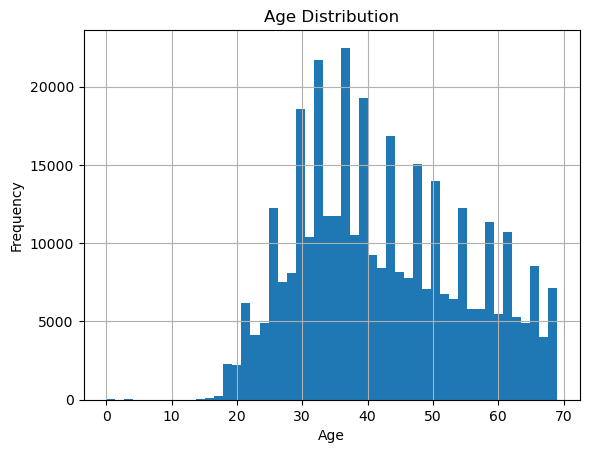

In [52]:
df['AGE'].hist(bins=50, range=(df['AGE'].min(), np.percentile(df['AGE'].dropna(), 95)))

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

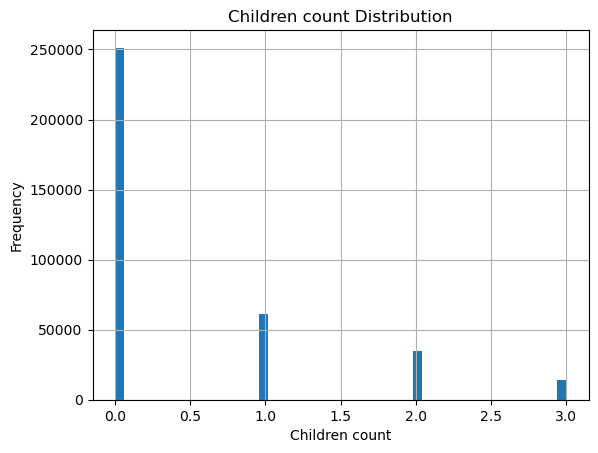

In [53]:
df['CHILDREN_CNT'].hist(bins=50, range=(df['CHILDREN_CNT'].min(), np.percentile(df['CHILDREN_CNT'].dropna(), 95)))

plt.title('Children count Distribution')
plt.xlabel('Children count')
plt.ylabel('Frequency')
plt.show()

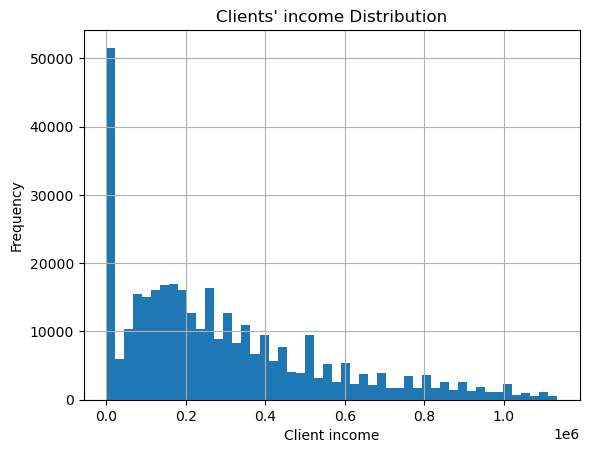

In [54]:
df['CLIENT_INCOME_AMT'].hist(bins=50, range=(df['CLIENT_INCOME_AMT'].min(), np.percentile(df['CLIENT_INCOME_AMT'].dropna(), 95)))

plt.title("Clients' income Distribution")
plt.xlabel('Client income')
plt.ylabel('Frequency')
plt.show()

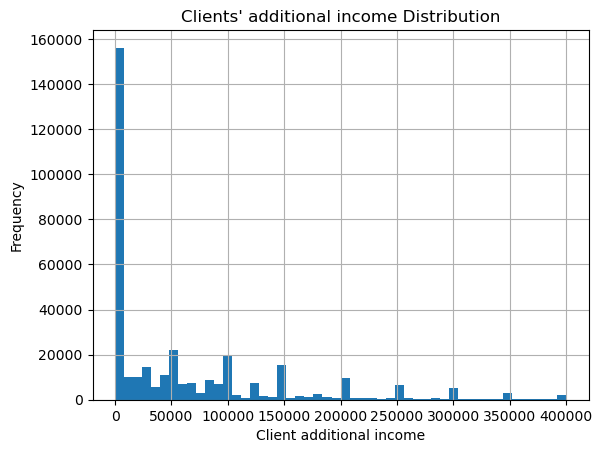

In [55]:
df['ADD_INCOME_AMT'].hist(bins=50, range=(df['ADD_INCOME_AMT'].min(), np.percentile(df['ADD_INCOME_AMT'].dropna(), 95)))

plt.title("Clients' additional income Distribution")
plt.xlabel('Client additional income')
plt.ylabel('Frequency')
plt.show()

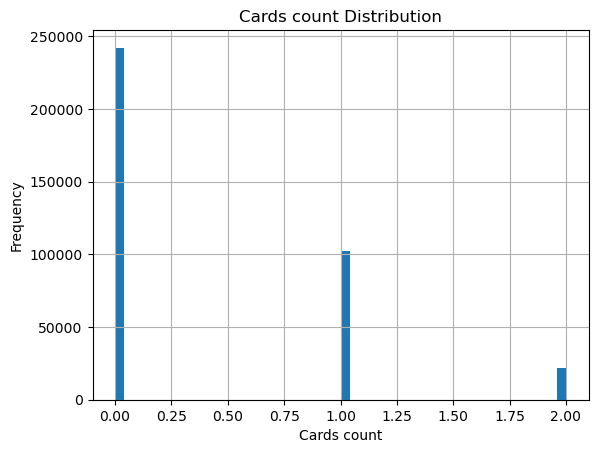

In [56]:
df['CARD_CUR_CNT'].hist(bins=50, range=(df['CARD_CUR_CNT'].min(), np.percentile(df['CARD_CUR_CNT'].dropna(), 95)))

plt.title('Cards count Distribution')
plt.xlabel('Cards count')
plt.ylabel('Frequency')
plt.show()

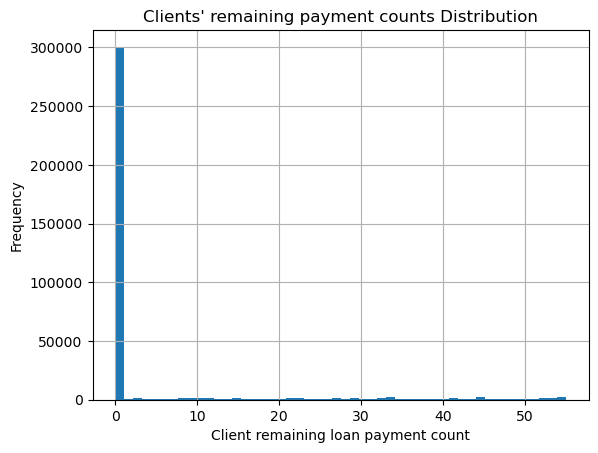

In [57]:
df['REMN_PAYMENT_CNT'].hist(bins=50, range=(df['REMN_PAYMENT_CNT'].min(), np.percentile(df['REMN_PAYMENT_CNT'].dropna(), 95)))

plt.title("Clients' remaining payment counts Distribution")
plt.xlabel('Client remaining loan payment count')
plt.ylabel('Frequency')
plt.show()

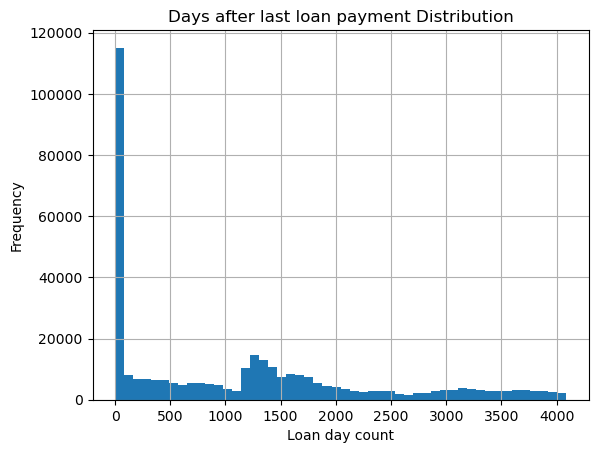

In [58]:
df['LOAN_DAY_CNT'].hist(bins=50, range=(df['LOAN_DAY_CNT'].min(), np.percentile(df['LOAN_DAY_CNT'].dropna(), 95)))

plt.title("Days after last loan payment Distribution")
plt.xlabel('Loan day count')
plt.ylabel('Frequency')
plt.show()

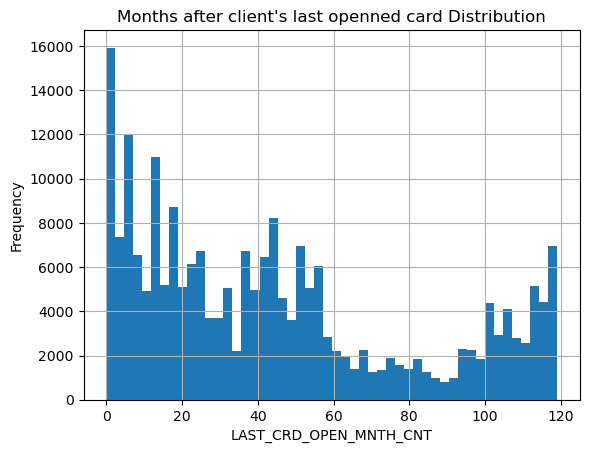

In [59]:
df['LAST_CRD_OPEN_MNTH_CNT'].hist(bins=50, range=(df['LAST_CRD_OPEN_MNTH_CNT'].min(), np.percentile(df['LAST_CRD_OPEN_MNTH_CNT'].dropna(), 95)))

plt.title("Months after client's last openned card Distribution")
plt.xlabel('LAST_CRD_OPEN_MNTH_CNT')
plt.ylabel('Frequency')
plt.show()

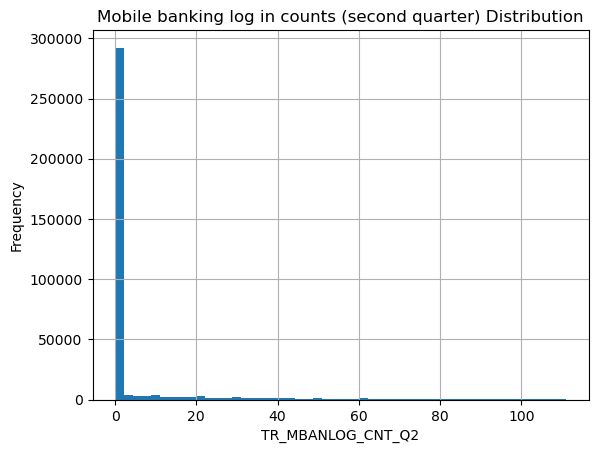

In [60]:
df['TR_MBANLOG_CNT_Q2'].hist(bins=50, range=(df['TR_MBANLOG_CNT_Q2'].min(), np.percentile(df['TR_MBANLOG_CNT_Q2'].dropna(), 95)))

plt.title("Mobile banking log in counts (second quarter) Distribution")
plt.xlabel('TR_MBANLOG_CNT_Q2')
plt.ylabel('Frequency')
plt.show()

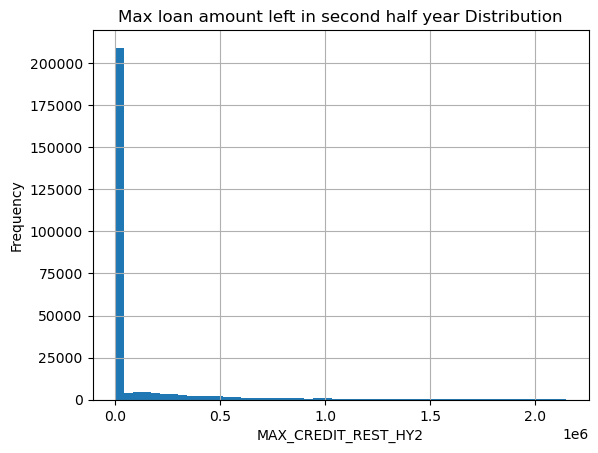

In [61]:
df['MAX_CREDIT_REST_HY2'].hist(bins=50, range=(df['MAX_CREDIT_REST_HY2'].min(), np.percentile(df['MAX_CREDIT_REST_HY2'].dropna(), 95)))

plt.title("Max loan amount left in second half year Distribution")
plt.xlabel('MAX_CREDIT_REST_HY2')
plt.ylabel('Frequency')
plt.show()

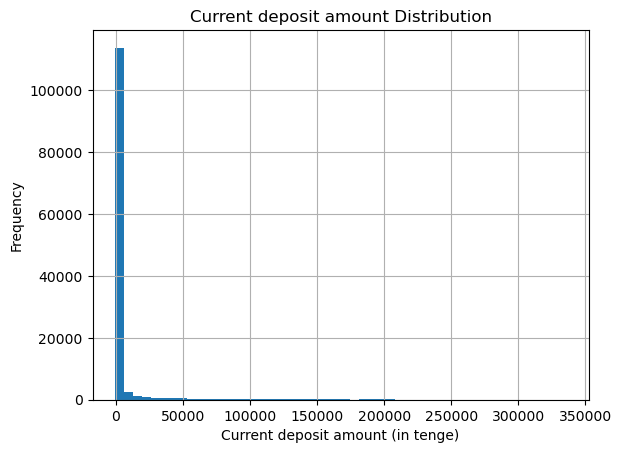

In [63]:
df['CUR_DEP_AMT'].hist(bins=50, range=(df['CUR_DEP_AMT'].min(), np.percentile(df['CUR_DEP_AMT'].dropna(), 95)))

plt.title("Current deposit amount Distribution")
plt.xlabel('Current deposit amount (in tenge)')
plt.ylabel('Frequency')
plt.show()

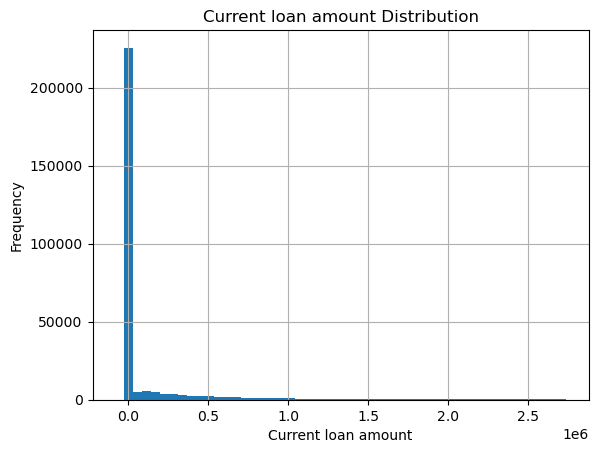

In [64]:
df['CUR_CREDIT_AMT'].hist(bins=50, range=(df['CUR_CREDIT_AMT'].min(), np.percentile(df['CUR_CREDIT_AMT'].dropna(), 95)))

plt.title("Current loan amount Distribution")
plt.xlabel('Current loan amount')
plt.ylabel('Frequency')
plt.show()

### Observations on Data Distribution

In our exploratory analysis, we observe that a substantial portion of the numerical data, particularly for features like CUR_CREDIT_AMT, is densely concentrated around the value of 0. This pattern warrants further investigation and consideration for several reasons:

1. **Indicator of Sparse or Inactive Features:** The concentration of data at 0 could indicate that these features are sparse or inactive for a significant number of observations. For instance, features like 'ADD_INCOME_AMT' might be 0 for many clients who do not have additional income sources.

2. **Impact of Data Collection Methods:** This pattern might reflect the nature of the data collection process. For example, if a feature represents a count or an occurrence (like 'CARD_CUR_CNT' or 'LOAN_DAY_CNT'), zeros could indicate a lack of activity or non-usage.

3. **Presence of Default Values:** In some cases, zeros might represent default values assigned during data entry or extraction. Understanding whether these zeros are true data points or placeholders for missing or unrecorded information is crucial.

4. **Data Preprocessing Implications:** The high density of zeros affects how we handle these features in preprocessing. Techniques such as normalization or log transformation may not be suitable. In some cases, creating binary indicators or applying different feature engineering techniques might be more appropriate.

5. **Relevance to Modeling:** For predictive modeling, understanding and appropriately handling these features is vital. They might carry significant information for certain predictions or could potentially introduce bias if not treated correctly.

In the subsequent steps, we will delve deeper into each of these features to understand their role in our dataset and consider appropriate data preprocessing strategies to address the high concentration of zeros.

Next, we explore the categorical features in our dataset. Using count plots, we can visualize the distribution of categories and understand how balanced these features are.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370914 entries, 9529273 to 63109545
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Target                  370914 non-null  int64  
 1   AGE                     370765 non-null  float64
 2   CHILDREN_CNT            370843 non-null  float64
 3   EDUCATION               283187 non-null  object 
 4   CLIENT_INCOME_AMT       370843 non-null  float64
 5   IS_CAR_FLG              370914 non-null  object 
 6   ADD_INCOME_AMT          370843 non-null  float64
 7   CARD_CUR_CNT            370914 non-null  int64  
 8   REMN_PAYMENT_CNT        370914 non-null  float64
 9   LOAN_DAY_CNT            370914 non-null  float64
 10  LAST_CRD_OPEN_MNTH_CNT  230119 non-null  float64
 11  TR_MBANLOG_CNT_Q2       370914 non-null  int64  
 12  MAX_CREDIT_REST_HY2     278156 non-null  float64
 13  CUR_DEP_AMT             131303 non-null  float64
 14  CUR_CREDIT_AMT   

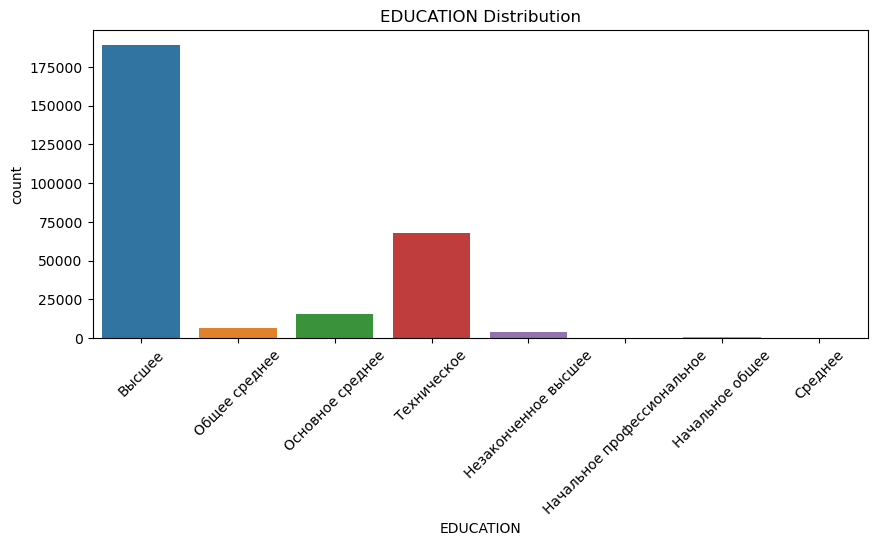

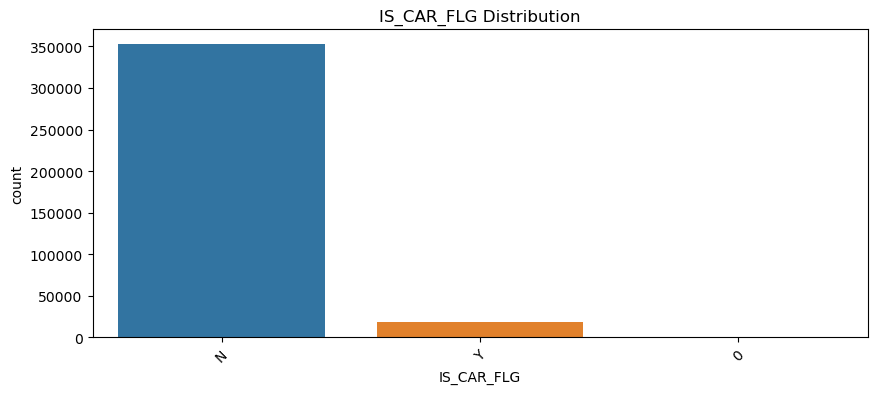

In [65]:
categorical_variables = ['EDUCATION', 'IS_CAR_FLG']

for variable in categorical_variables:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=variable, data=df)
    plt.title(f'{variable} Distribution')
    plt.xticks(rotation=45)
    plt.show()

### Exploratory Data Analysis of Categorical Variables

Our exploratory data analysis includes a review of the categorical variables 'EDUCATION' and 'IS_CAR_FLG'. The distribution of these variables is visualized in bar charts, providing a clear picture of the dataset's composition in terms of clients' education levels and car ownership status.

#### Education Distribution
The 'EDUCATION' bar chart shows a significant variation in education levels among clients. We observe that the majority of clients have achieved "Высшее". In contrast, "Среднее" is much less common. This distribution can impact our model, as education level may correlate with financial behavior and, consequently, loan acquisition likelihood.

#### Car Ownership Flag Distribution
Looking at the 'IS_CAR_FLG' distribution, there is a noticeable imbalance between clients who own a car ('1') and those who do not ('0'). The prevalence of one category over the other could indicate that car ownership is either less common or not frequently disclosed among the clientele of this dataset. It's important to note that the flag uses '0' as a character, which we may consider changing to 'N' to clearly represent the binary nature of this feature in future data preprocessing steps.

These insights into the categorical variables will guide us in feature engineering and in understanding the factors that may influence the predictive model. The next steps will involve delving deeper into how these categorical variables interact with the target variable and determining the best ways to encode them for model training.

## Correlation Analysis

To understand how different features relate to each other and to our target variable, we perform a correlation analysis. This helps in identifying features that are strongly or weakly associated with the target, guiding feature selection for model building.

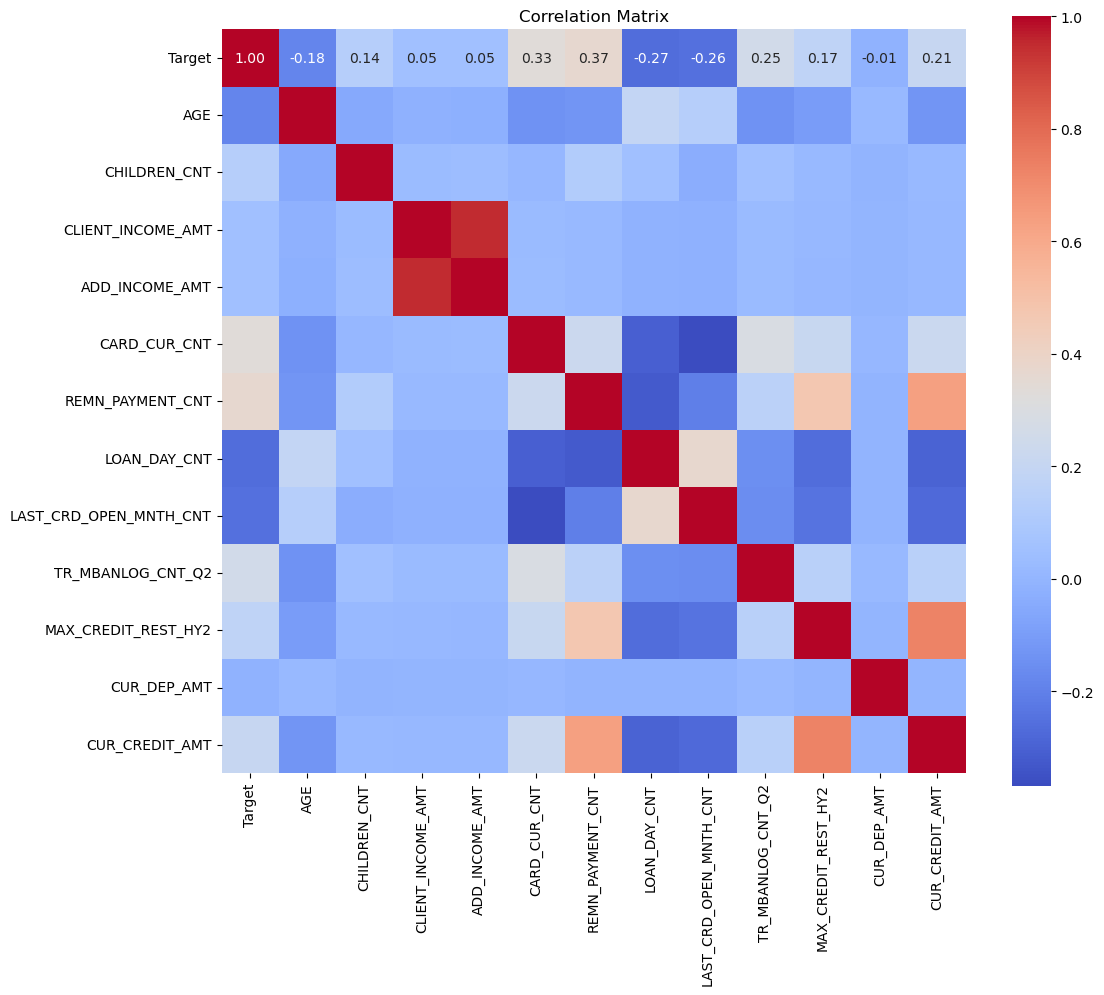

In [71]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Exploratory Data Analysis: Key Correlation Insights

The correlation heatmap provides initial insights into the relationships between features:

- **Target Correlation:** The correlations with the target are moderate, suggesting the need for a combination of features in predictive modeling.
- **Age and Income:** 'AGE' shows a slight negative correlation with the target, while 'CLIENT_INCOME_AMT' has a slight positive correlation, hinting at younger clients and those with higher incomes being more likely to accept loan offers.
- **Financial Behavior:** A mild positive correlation between 'CARD_CUR_CNT' and 'REMN_PAYMENT_CNT' may reflect consistent financial behavior patterns among clients.
- **Credit Relationships:** 'MAX_CREDIT_REST_HY2' and 'CUR_CREDIT_AMT' are moderately correlated, indicating a potential link between credit amounts and credit limits.
- **Deposits vs. Credit:** A low correlation between 'CUR_DEP_AMT' and 'CUR_CREDIT_AMT' suggests deposits are not strongly indicative of credit use.
- **Digital Engagement:** The lack of significant correlation between 'TR_MBANLOG_CNT_Q2' and the target implies that digital engagement is not a primary factor in loan uptake decisions.

The absence of strong correlations underscores the multifactorial nature of loan acquisition and the need for a nuanced approach to feature engineering and model development.


## Conclusion of Exploratory Data Analysis

The exploratory data analysis has provided valuable insights into the dataset's characteristics and the interrelationships between features. While we observed no strong direct correlations with the target variable, the moderate and weak correlations suggest that loan acceptance is influenced by a complex interplay of demographic and financial behaviors. The findings from the univariate and bivariate analyses indicate that younger clients and those with higher incomes may have a higher propensity for loan acceptance. However, digital engagement metrics like mobile banking logins did not show a significant direct correlation with loan uptake, suggesting the influence of additional factors.

These insights set the stage for the subsequent phases of model development and feature engineering. They highlight the importance of considering a multifaceted approach that encompasses various aspects of a client's profile. As we transition into model building, we will carry forward the nuances uncovered in this analysis to construct a robust predictive model.